# COVID19 Twitter Data Analysis

### Objective:

To build a Twitter trend analyzer that will analyze a set of tweets using NLP and text-processing techniques. The trend analyzer will work on a given set of tweets, seeded on COVID19 / CORONA:


->A tag cloud depicting what topics / Word was being talked about on Twitter

->Which hashtag trended (Hashtags are words or phrases beginning with # eg #COVID)

->Which Twitter Handler dominated the conversation on Twitter

## 1. Importing the data

In [1]:
#importing libraries
import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [2]:
#reading the data
data=pd.read_csv("Tweeter_Data_IN.csv")

In [3]:
data

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44174,Thu May 07 03:46:30 +0000 2020,HardAreaAllowance HCWs Corona Doctors Covid Ha...,10,1258241775044620000,en,"New Delhi, India",7,#HardAreaAllowance for #HCWs: During #Corona p...,https://twitter.com/ompsychiatrist/status/1258...,ompsychiatrist,"Psychiatrist, Avid Reader, Thinker",20066,3241,375,19,"New Delhi, India",Dr Om Prakash MD (Psychiatry),ompsychiatrist,9457
44175,Thu May 07 02:57:32 +0000 2020,NaN,0,1258229450019180000,en,"Faridabad, India",0,@ZeeNews @sudhirchaudhary But who did not had ...,https://twitter.com/Dubeymkd1944/status/125822...,Dubeymkd1944,NaN,1182,21,72,0,Fbd,Satyamew Jayte,Dubeymkd1944,3433
44176,Thu May 07 03:47:42 +0000 2020,NaN,5,1258242077088820000,en,"Orissa, India",1,No Surprises https://t.co/6RWca4U7mP,https://twitter.com/Bikram_Odisha/status/12582...,Bikram_Odisha,"A learner. Fan of @Naveen_Odisha & @iamsrk , p...",0,1937,1171,3,"Kujang,Jagatsinghpur, Odisha",Bikram Swain,Bikram_Odisha,23734
44177,Thu May 07 03:48:04 +0000 2020,NaN,0,1258242168189310000,en,"Noida, India",0,Coronavirus lockdown: Industries hit hard in S...,https://twitter.com/liyer/status/1258242168189...,liyer,Journalist.Worked@MumbaiMirror.,7565,1033,427,18,New Delhi,lakshmi iyer,liyer,15185


In [4]:
data.columns

Index(['created_at', 'hashtags', 'favorite_count', 'id', 'lang', 'place',
       'retweet_count', 'text', 'tweet_url', 'user_screen_name',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name.1', 'user_statuses_count'],
      dtype='object')

In [5]:
#checking for NULL values
data.isnull().sum()

created_at                   0
hashtags                 26272
favorite_count               0
id                           0
lang                         0
place                       17
retweet_count                0
text                         0
tweet_url                    0
user_screen_name             0
user_description          6274
user_favourites_count        0
user_followers_count         0
user_friends_count           0
user_listed_count            0
user_location             6677
user_name                    3
user_screen_name.1           0
user_statuses_count          0
dtype: int64

## 2. Generating word cloud based on the tweets

In [6]:
import warnings
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Shreya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [7]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
tweets=data["text"]
tweets

0        Meditation and mindfulness tips for coping wit...
1        Contribute to INDIA FIGHTS CORONA @ Gandhinaga...
2        @DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...
3        #SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...
4        https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...
                               ...                        
44174    #HardAreaAllowance for #HCWs: During #Corona p...
44175    @ZeeNews @sudhirchaudhary But who did not had ...
44176                 No Surprises https://t.co/6RWca4U7mP
44177    Coronavirus lockdown: Industries hit hard in S...
44178             Live With Corona https://t.co/Tk8CrHPT2L
Name: text, Length: 44179, dtype: object

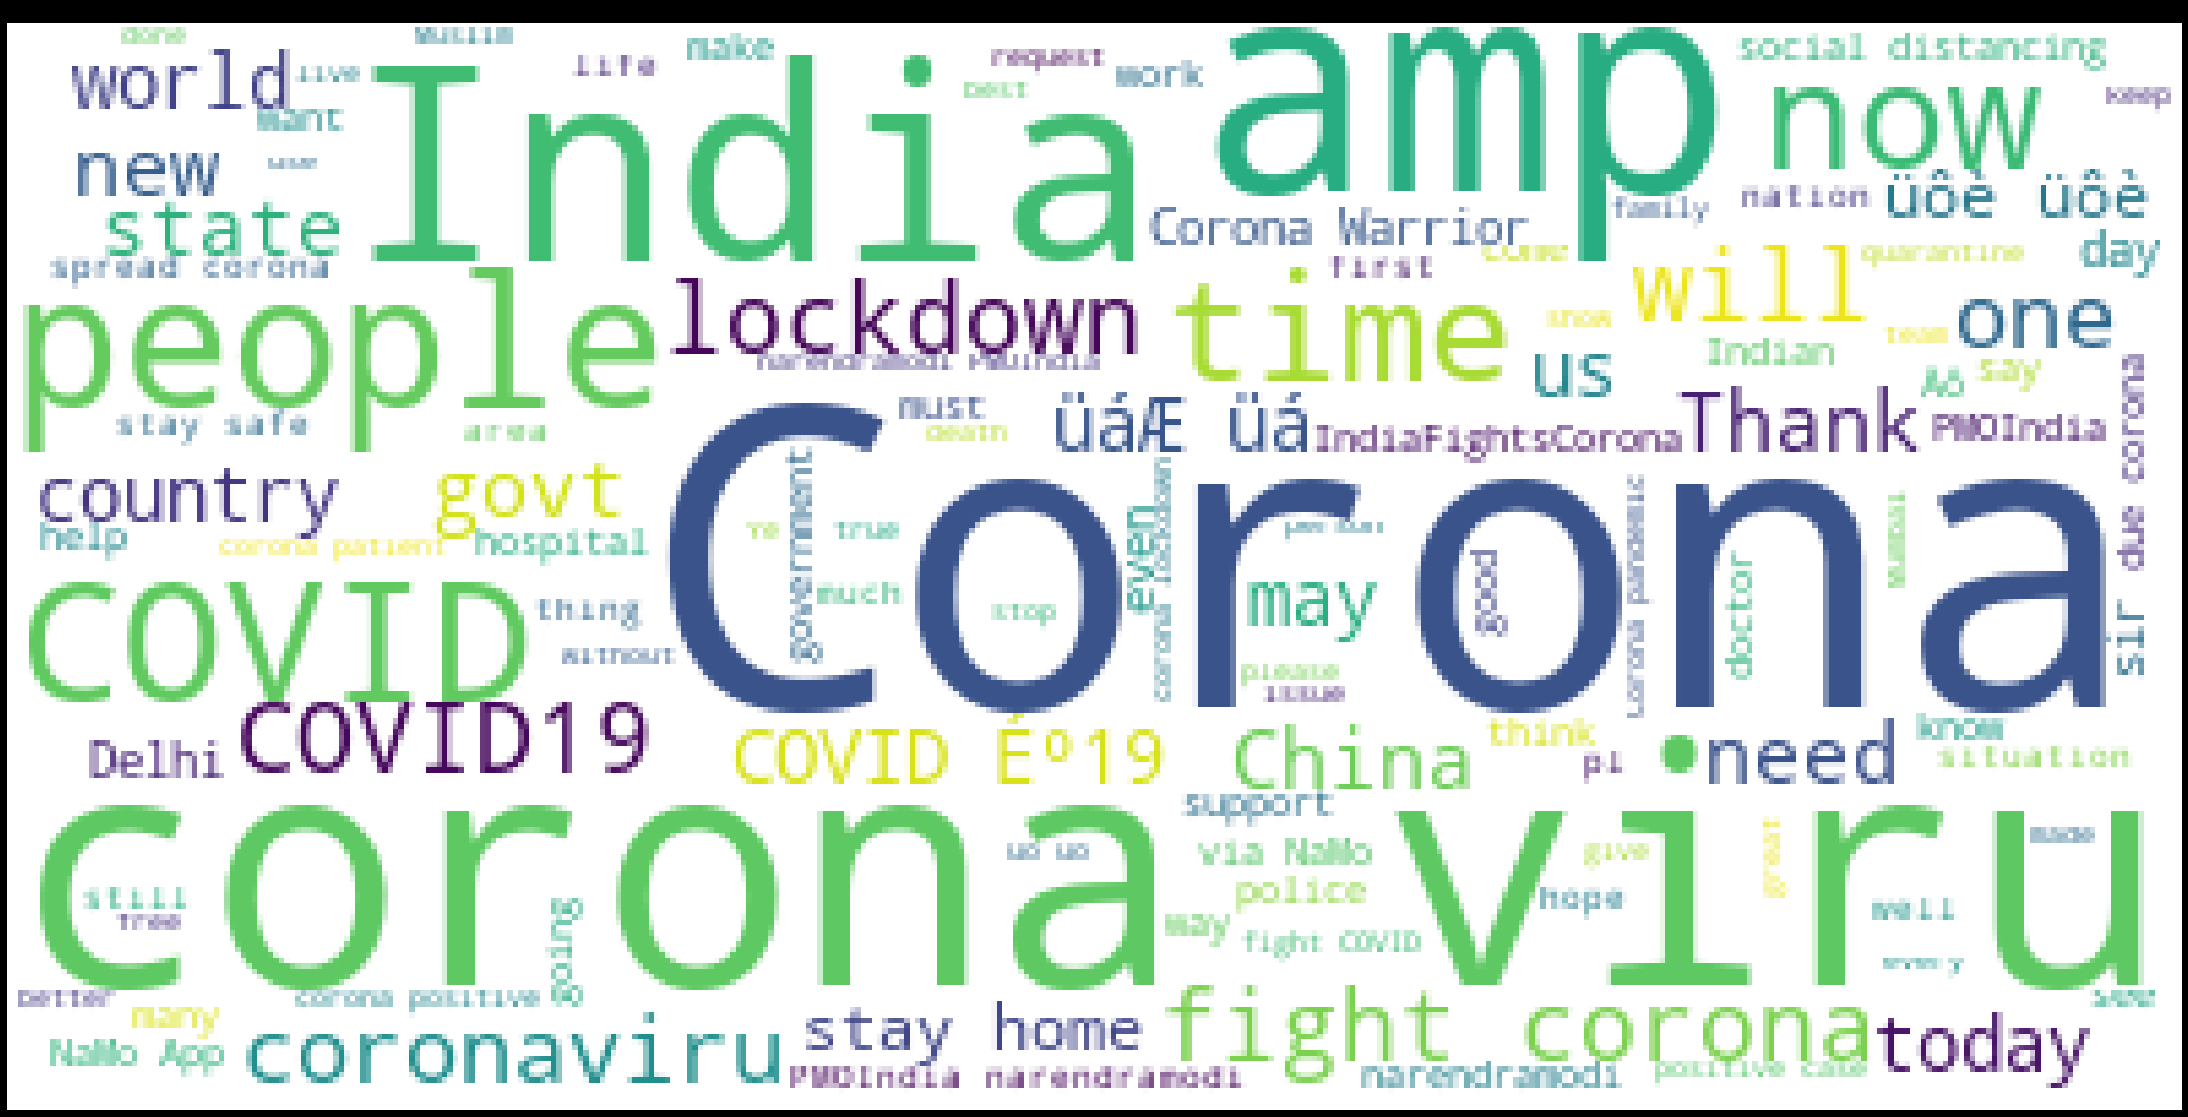

In [9]:
def word_cloud(tweets):
    stopwords = set(STOPWORDS)
    stopwords.update(["https", "co"])
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 5000).generate(" ".join([tw for tw in tweets]))
    plt.figure( figsize=(40,20), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Twitter WordCloud")
word_cloud(tweets)

## 3. The relative popularity of the hashtags

In [10]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("#")]]
df = pd.DataFrame({"hashtag": tags})
print(df['hashtag'].value_counts().head(20))

#Corona                 2676
#COVID19                1766
#corona                 1648
#coronavirus            1430
#IndiaFightsCorona      1111
#COVID„Éº19             1009
#lockdown                983
#COVID                   818
#Covid_19                542
#StayHomeStaySafe        478
#covid19                 460
#COVID2019               436
#StayHome                424
#coronavirusindia        376
#India                   372
#Covid19                 345
#stayhome                326
#staysafe                305
#CoronavirusOutbreak     297
#CoronaWarriors          272
Name: hashtag, dtype: int64


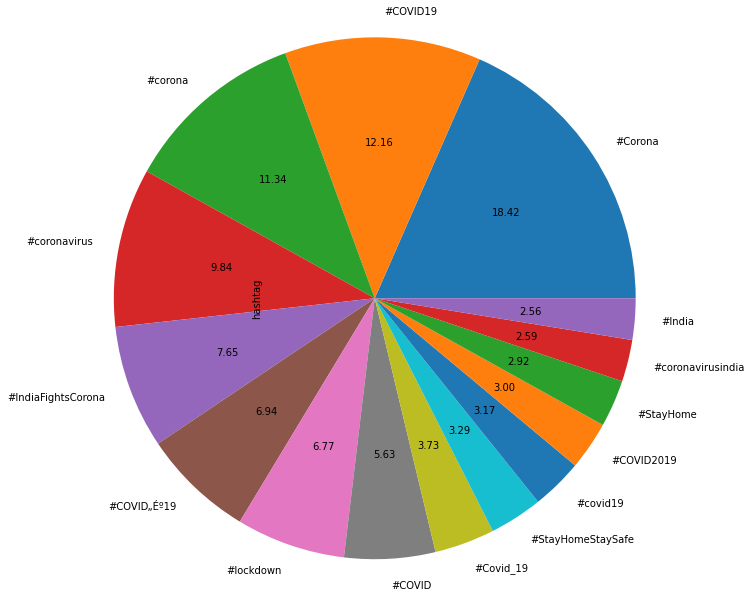

In [11]:
df['hashtag'].value_counts().head(15).plot(kind='pie', autopct='%.2f', radius=3);

## 4. Top 10 twitter handlers which are most active.

In [12]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("@") and len(i) != 1 ]]
df = pd.DataFrame({"handlers": tags})
print(df['handlers'].value_counts().head(10))

narendramodi       3691
PMOIndia           2720
AmitShah            732
ArvindKejriwal      722
MoHFW_INDIA         536
myogiadityanath     515
CMOMaharashtra      488
RahulGandhi         467
aajtak              425
BJP4India           347
Name: handlers, dtype: int64


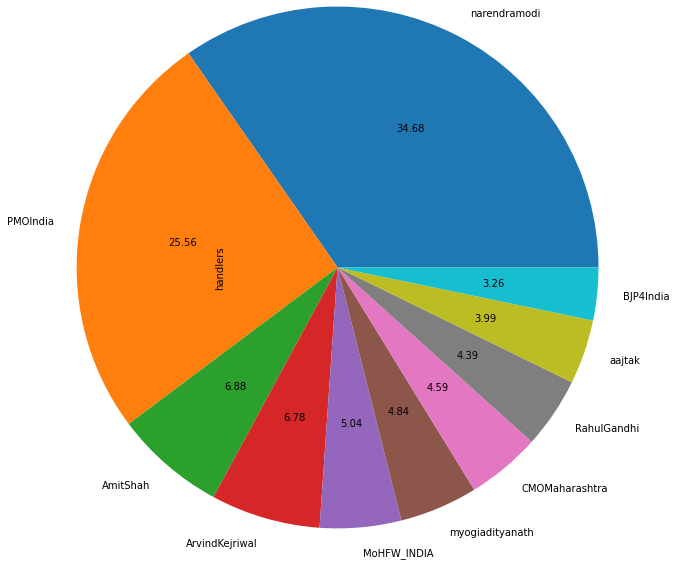

In [13]:
df['handlers'].value_counts().head(10).plot(kind='pie', autopct='%.2f', radius=3);

## 5. Conclusion

Analyzing thousands of texts in just a few seconds and automatically get information such as topic, sentiment, or language.

->Improve Customer Service

->Improve Media Perceptions

->Improve Crises Management

->Develop Quality Products

->Discovering New Marketing Strategies


#### Contributed by: Shreya Garg